In [33]:
import tensorflow as tf
import cv2 as cv
import tarfile
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [34]:
tar_path = "./ssd_mobilenet_v2_fpnlite_640x640_1.tar.gz"
extract_path = "./models/"

with tarfile.open(tar_path, "r:gz") as file:
    file.extractall(path=extract_path)

In [35]:
mobile_net = tf.saved_model.load(extract_path)

In [36]:
mobile_net = mobile_net.signatures["serving_default"]

In [50]:
img = cv.imread(cv.samples.findFile("./boule.jpg"))
b,g,r = cv.split(img)
img = cv.merge((r,g,b))
img = cv.resize(img, (640,640))

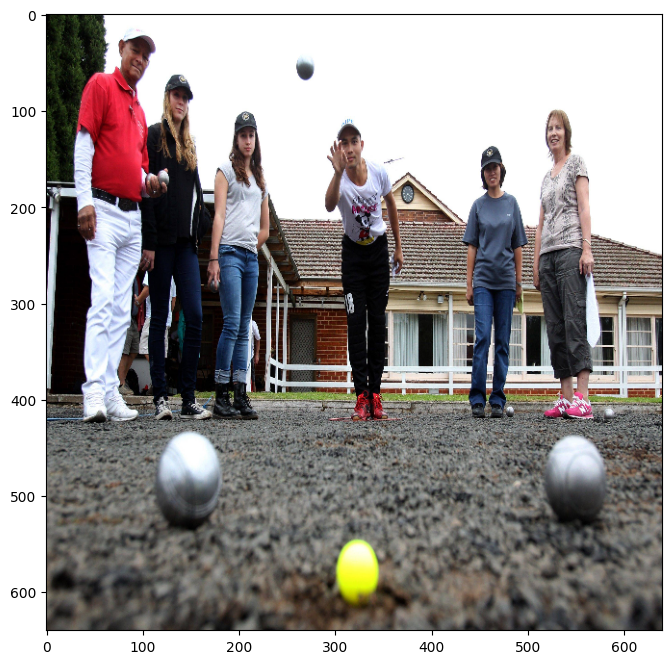

In [52]:
plt.figure(figsize=(8,8))
plt.imshow(img)

In [56]:
img = tf.convert_to_tensor(img, dtype=tf.uint8)
img = tf.expand_dims(img, axis=0)

In [57]:
output = mobile_net(img)

In [58]:
boxes = output["detection_boxes"].numpy()[0]
scores = output["detection_scores"].numpy()[0]
classes = output["detection_classes"].numpy()[0].astype(int)
detections = output["num_detections"]

Text(0.5, 1.0, 'ORIGINAL')

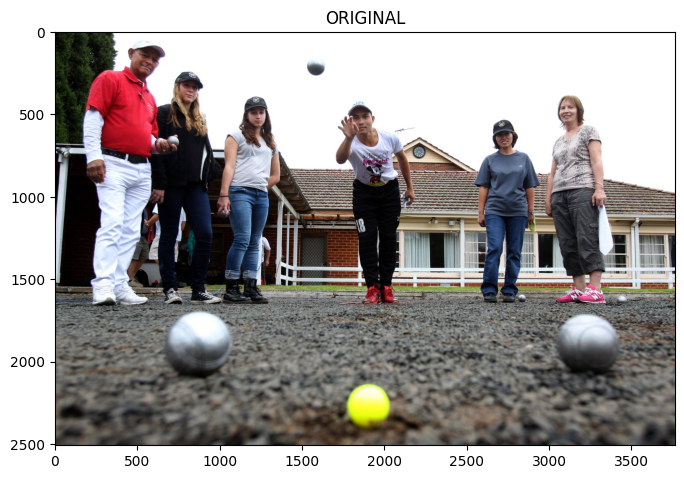

In [45]:
img_np = cv.imread(cv.samples.findFile("./boule.jpg"))

plt.figure(figsize=(8,8))
plt.imshow(img_np[:,:,::-1])
plt.title("ORIGINAL")

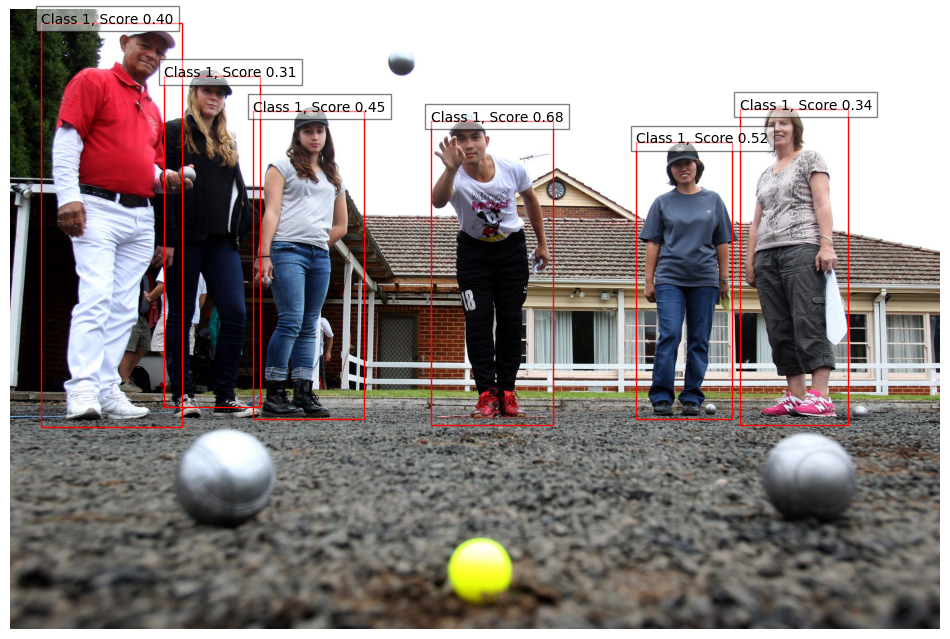

In [64]:
threshold = 0.3
num_people = 0
fig, ax = plt.subplots(1, figsize=(12,9))
ax.imshow(img_np[:,:,::-1])

for box, score, label in zip(boxes, scores, classes):

    if score > threshold and label == 1:
        num_people += 1
        x, y = box[1] * img_np.shape[1], box[0] * img_np.shape[0]
        width = (box[3] - box[1]) * img_np.shape[1]
        height = (box[2] - box[0]) * img_np.shape[0]

        ax.add_patch(patches.Rectangle((x, y), width, height, linewidth=1, edgecolor="r", facecolor="none"))
        ax.text(x, y, f"Class {label}, Score {score:.2f}", bbox=dict(facecolor="white", alpha=0.5))

plt.axis("off")
plt.show()